In [1]:
import sys, os
sys.path.append("..")
import numpy as np
import common as com
import sys as sys
import os as osx
import fisher_plot as fsh
import matplotlib.pyplot as plt
from astropy.cosmology import Planck15, z_at_value
import astropy.units as u
from scipy.optimize import fsolve
from scipy.interpolate import interp1d
import in_out as ino

%load_ext autoreload
%autoreload 2
%matplotlib inline

# Figure 2: $C_\ell$ plots

In [2]:
# Make plot and temp ini file directories

plots_dir = "/group/hepheno/smsharma/GoFish/LSST_nu//plots/"
ini_dir = "/group/hepheno/smsharma/GoFish/LSST_nu/ini_files/"

for d in [plots_dir, ini_dir]:
    if not os.path.exists(d):
        try: os.mkdir(d)
        except OSError as e:
            if e.errno != 17:
                raise

In [3]:
parlist = []
parnames = []
label = "Cls"
f_str = "#Cosmological parameters\n[och2]\n#Fiducial value\nx= 0.1197\n#Increment used for numerical derivatives\ndx= 0.001\n#Set to 'no' if this parameter should be keep fixed\nis_free= no\nonesided=0\n\n[obh2]\nx= 0.02222\ndx= 0.0001\nis_free= no\nonesided=0\n\n[hh]\nx= 0.69\ndx= 0.01\nis_free= no\nonesided=0\n\n[A_s]\nx= 2.1955\ndx= 0.01\nis_free= no\nonesided=0\n\n[ns]\nx= 0.9655\ndx= 0.005\nis_free= no\nonesided=0\n\n[tau]\nx=0.06\ndx=0.02\nis_free = no\nonesided = 0\n\n[rt]\nx=0.00\ndx=0.005\nis_free = no\nonesided = 1\n\n[mnu]\nx=60.\ndx=10.\nis_free = yes\nonesided = 0\n\n[pan]\nx=0.\ndx=0.02\nis_free = no\nonesided = 1\n\n[Tracer 1]\ntracer_name= CMB_exp\ntracer_type= cmb_primary\n#Has temperature?\nhas_t= yes\n#Has polarization?\nhas_p= yes\n#Noise level in temperature in units of uK-arcmin in the two ell regimes\nsigma_t= 31.13 1.0\n#Noise level in polarization in units of uK-arcmin in the two ell regimes\nsigma_p= 150.0 1.4\n#Beam size in units of arcmin in the two ell regimes\nbeam_amin= 10.0 3.0 \n#Ell value that marks the transition\nl_transition= 50\n#Minimum ell\nlmin= 2\n#Maximum ell\nlmax= 3000 \nuse_tracer= yes\n\n[Tracer 2]\ntracer_name= CMB_exp_lensing\ntracer_type= cmb_lensing\n#Noise level in temperature in units of uK-arcmin (implicitly scaled by sqrt(2) in polarization)\nsigma_t= 1.0\n#Beam size in units of arcmin\nbeam_amin= 3.0\nlmin= 30\nlmax= 3000\nuse_tracer= yes\n\n[CLASS parameters]\nlmax_cmb= 5000\nlmax_lss= 5000\nlmin_limber= 100\ninclude_alignment= yes\ninclude_rsd= yes\ninclude_magnification= no\ninclude_gr_vel= no\ninclude_gr_pot= no\nexec_path=./class_mod\nuse_nonlinear= yes\nuse_baryons= yes\nf_sky= 0.4\n\n\n[Behaviour parameters]\nmodel= wCDM\nsave_cl_files= yes\nsave_param_files= yes\n\n[Output parameters]\noutput_spectra= run\n\noutput_dir= ../outputs_LSST_DESI_lmax5000_Cls/\noutput_fisher= FisherCls\n[Tracer 3]\ntracer_name= LSST_gold_sh\ntracer_type= gal_shear\nbins_file= ../curves_LSST/bins_gold.txt\nnz_file= ../curves_LSST/nz_shear_fiducial.txt\nabias_file= ../curves_LSST/az_gold_nomarg.txt\nrfrac_file= ../curves_LSST/rf_gold.txt\nsigma_gamma= 0.28\ninclude_m_bias = no\nm_step = 0.005\nuse_tracer= yes\n\n[Tracer 4]\ntracer_name= LSST_blue_cl\ntracer_type= gal_clustering\nbins_file= ../curves_LSST/bins_blue_nomarg.txt\nnz_file= ../curves_LSST/nz_blue.txt\nbias_file= ../curves_LSST/bz_blue_nomarg.txt\nsbias_file= ../curves_LSST/sz_blue.txt\nebias_file= ../curves_LSST/ez_blue.txt\nuse_tracer= yes\n\n[Tracer 5]\ntracer_name= LSST_red_cl\ntracer_type= gal_clustering\nbins_file= ../curves_LSST/bins_red_nomarg.txt\nnz_file= ../curves_LSST/nz_red.txt\nbias_file= ../curves_LSST/bz_red_nomarg.txt\nsbias_file= ../curves_LSST/sz_red.txt\nebias_file= ../curves_LSST/ez_red.txt\nuse_tracer= yes\n\n[ok]\nx= 0.0\ndx= 0.015\nis_free= yes\nonesided=0\n\n\n[w0]\nx= -1.0\ndx= 0.01\nis_free= yes\nonesided=0\n\n[wa]\nx=0.0\ndx=0.05\nis_free = yes\nonesided=0\n\n"

fname = ini_dir + "tempParamCls.ini"

f=open(fname, "w")
f.write(f_str)
f.close()

parlist.append(fname)
parnames.append(label)

In [4]:
pars=[com.ParamRun(parname) for parname in parlist]

for i in range(len(parlist)):
#     pars[i] = com.ParamRun(parlist[i])
    print " "
    if (not os.path.isfile(pars[i].output_dir+"/"+pars[i].output_fisher+"/fisher_raw.npz")) :
        print "<> Computing/reading relevant signal power spectra"
        pars[i].get_cls_all()

        if pars[i].just_run_cls==False :
            print "<> Computing relevant noise power spectra"
            pars[i].get_cls_noise()
            print " "

Adding prior on photo-z bias
Adding prior on photo-z bias
Adding prior on photo-z bias
 <><> Run parameters
  - Overall l_max = 5000
  - LSS l_max = 5000
  - CMB l_max = 5000
  - Output directory : ../outputs_LSST_DESI_lmax5000_Cls/
  - Output spectra : ../outputs_LSST_DESI_lmax5000_Cls//run
  - Output Fisher : FisherCls
  - 24 (24) bins used (read) for galaxy clustering
  - 9 (9) bins used (read) for galaxy shear
  - 3 (3) bins used (read) for CMB primary
  - 1 (1) bins used (read) for CMB lensing
  - 37 bins used in total
  - 5 tracers read : 
     1. CMB_exp. Type: cmb_primary, 3 bins.
     2. CMB_exp_lensing. Type: cmb_lensing, 1 bins.
     3. LSST_gold_sh. Type: gal_shear, 9 bins.
     4. LSST_blue_cl. Type: gal_clustering, 9 bins.
     5. LSST_red_cl. Type: gal_clustering, 15 bins.
  - Overlaping sky fraction : 0.400
  - Terms included for galaxy clustering : density, rsd1
  - Terms included for galaxy shear : lensing_shear, intrinsic_alignment
  - 4 free parameters :
    * mnu :

../tracers.py:680: RuntimeWarning: invalid value encountered in divide
  cos2phi = np.nan_to_num(2 * ((Ldotl1 - l**2) / (l * l2))**2 - 1.)
../tracers.py:702: RuntimeWarning: invalid value encountered in divide
  cosphi = np.nan_to_num((Ldotl1 - l**2) / (l * l2))
../tracers.py:719: RuntimeWarning: invalid value encountered in divide
  cos2phi = np.nan_to_num(2. * ((Ldotl1 - l**2) / (l * l2))**2 - 1.)
../tracers.py:751: RuntimeWarning: invalid value encountered in divide
  cosphi =np.nan_to_num( (Ldotl1 - l**2) / (l * l2) )


   LSST_gold_sh


/group/hepheno/heptools/anaconda3/envs/venv_py27/lib/python2.7/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


   LSST_blue_cl
0 14931216.1922 -0.0 0.162162 0.054054
1 49109007.0275 0.162162 0.350621 0.06282
2 79018539.4946 0.350621 0.56964 0.073007
3 92296654.9546 0.56964 0.824177 0.084845


/group/hepheno/heptools/anaconda3/envs/venv_py27/lib/python2.7/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)


4 89279140.6194 0.824177 1.119989 0.098604
5 75327183.8974 1.119989 1.463771 0.114594
6 47554508.2141 1.463771 1.863302 0.133177
7 19267797.5052 1.863302 2.327621 0.154773
8 3886239.79106 2.327621 2.867235 0.17987
   LSST_red_cl
0 24889.9795124 0.0 0.061856 0.020619
1 147321.217934 0.061856 0.127537 0.021894
2 406015.293655 0.127537 0.197282 0.023248
3 812715.239133 0.197282 0.271341 0.024686
4 1369550.89021 0.271341 0.34998 0.026213
5 2064841.3261 0.34998 0.433484 0.027835
6 2865354.93141 0.433484 0.522153 0.029556
7 3704790.65112 0.522153 0.616307 0.031385
8 4467181.19403 0.616307 0.716285 0.033326
9 4969107.43958 0.716285 0.822447 0.035387
10 4959260.90731 0.822447 0.935176 0.037576
11 4198145.61075 0.935176 1.054877 0.0399
12 2726849.90098 1.054877 1.181983 0.042369
13 1168583.06499 1.181983 1.316951 0.044989
14 274968.734453 1.316951 1.460268 0.047772
 


In [5]:
import in_out as ino

par = 'mnu'
params_fshr = pars[0].params_fshr[np.where(np.array([pars[0].params_fshr[i].name for i in range(len(pars[0].params_fshr))]) == par)[0][0]]

NLB=1

pname=par
clp=(ino.get_cls(pars[0],pname, 1)).reshape((pars[0].lmax+1)/NLB,NLB,pars[0].nbins_total,pars[0].nbins_total).mean(axis=1)
clm=(ino.get_cls(pars[0],pname,-1)).reshape((pars[0].lmax+1)/NLB,NLB,pars[0].nbins_total,pars[0].nbins_total).mean(axis=1)

In [6]:
def ell(k, z):
    return k*Planck15.angular_diameter_distance(z).value*(1+z)

In [7]:
zbins = np.loadtxt("../curves_LSST/bins_gold.txt", unpack=True)
z0 = zbins[0]
zf = zbins[1]
zmean = (z0+zf)/2

In [8]:
opt = dict(color='r', 
            arrowstyle = 'simple,head_width=.75,head_length=.75',
            connectionstyle = 'arc3,rad=0')

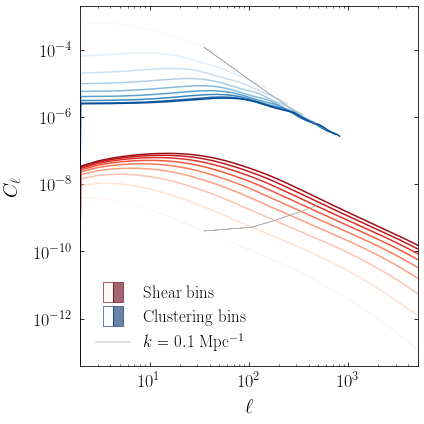

In [9]:
oFig1 = plt.figure(1,figsize=(6,6))

def norm(idx, maxidx = 9, minidx = 0):
    return (idx - minidx) / float(maxidx - minidx)

fs=12
cols=['r','g','b','k','y','m','c']
ncols=len(cols)
ibin_tot=0
larr=np.arange((pars[0].lmax+1)/NLB)*NLB+0.5*(NLB-1)

idx = 0
for tr in pars[0].tracers :
    if tr.consider_tracer==False :
        ibin_tot += tr.nbins
        continue
        
        
    if tr.name[:3] == "CMB": 
        ibin_tot += tr.nbins
        continue
        
    if "red" in tr.name: 
        ibin_tot += tr.nbins
        continue
    
    x100_ary = []
    y100_ary = []
    
    for ibin in np.arange(tr.nbins) :
        
        pname=par
        
        if 'cl' in tr.name:
            color = plt.cm.Blues(norm(ibin))
        else:
            color = plt.cm.Reds(norm(ibin))


        indices=np.where((larr>=tr.lmin) & (larr<=min(tr.lmax,tr.lmax_bins[ibin])))[0]
        plt.plot(larr[indices],np.array(pars[0].cl_fid_arr[indices,ibin_tot,ibin_tot]),
                 cols[ibin%ncols]+'-',label="Bin %d"%ibin, color=color)
        
        x100 = ell(.1, zmean[ibin])
        y100 = np.interp(x100,larr[indices],np.array(pars[0].cl_fid_arr[indices,ibin_tot,ibin_tot]))
        
        x100_ary.append(x100)
        y100_ary.append(y100)


        sell_arr = np.arange(0,2000,10)[np.arange(0,2000,10) < len(pars[0].cl_noise_arr[indices,ibin_tot,ibin_tot])]

        ibin_tot+=1
        plt.ylabel("$C_\\ell$",fontsize=20)
        plt.xlabel("$\\ell$",fontsize=20)
        plt.xlim(2,5000)
        plt.tight_layout()
        plt.yscale("log")
        plt.xscale("log")
        plt.plot(x100_ary, y100_ary, color='darkgrey', lw=0.5, ls='-',alpha=0.5)


m3, = plt.plot([], [], c=plt.cm.Blues(0.) , marker='s', markersize=20,
              fillstyle='left', linestyle='none',alpha=0.6)

m4, = plt.plot([], [], c=plt.cm.Blues(1.)  , marker='s', markersize=20,
              fillstyle='right', linestyle='none',alpha=0.6)

m1, = plt.plot([], [], c=plt.cm.Reds(0.) , marker='s', markersize=20,
              fillstyle='left', linestyle='none',alpha=0.6)

m2, = plt.plot([], [], c=plt.cm.Reds(1.)  , marker='s', markersize=20,
              fillstyle='right', linestyle='none',alpha=0.6)

k0p1 = plt.Line2D((0,1),(0,0), color='lightgrey')

plt.arrow(1000, 2000, 1e-12, 1e-8, head_width=0, head_length=0, fc='k', ec='k')



handles = [(m1,m2),(m3,m4), k0p1] #, handles[2]]
labels = ['Shear bins','Clustering bins','$k=0.1$ Mpc$^{-1}$'] #, labels[2]]


leg = plt.legend(handles,labels,loc='lower left',fontsize=17,fancybox=True,facecolor='none',frameon=False)

plt.tight_layout()
plt.savefig(plots_dir+"Cls.pdf")


/group/hepheno/heptools/anaconda3/envs/venv_py27/lib/python2.7/site-packages/ipykernel/__main__.py:59: RuntimeWarning: invalid value encountered in divide
/group/hepheno/heptools/anaconda3/envs/venv_py27/lib/python2.7/site-packages/ipykernel/__main__.py:76: RuntimeWarning: invalid value encountered in divide
/group/hepheno/heptools/anaconda3/envs/venv_py27/lib/python2.7/site-packages/ipykernel/__main__.py:81: RuntimeWarning: divide by zero encountered in divide


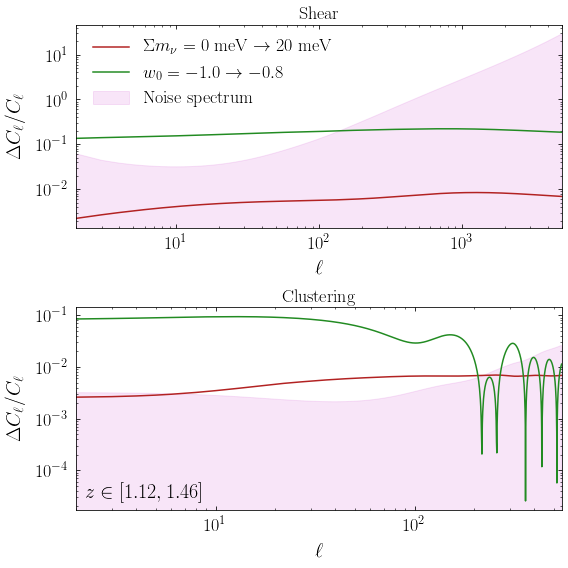

In [10]:
par = 'mnu'
params_fshr = pars[0].params_fshr[np.where(np.array([pars[0].params_fshr[i].name for i in range(len(pars[0].params_fshr))]) == par)[0][0]]

NLB=1

pname=par
clp=(ino.get_cls(pars[0],pname, 1)).reshape((pars[0].lmax+1)/NLB,NLB,pars[0].nbins_total,pars[0].nbins_total).mean(axis=1)
clm=(ino.get_cls(pars[0],pname,-1)).reshape((pars[0].lmax+1)/NLB,NLB,pars[0].nbins_total,pars[0].nbins_total).mean(axis=1)

oFig1 = plt.figure(1,figsize=(8,8))


fs=20
cols=['r','g','b','k','y','m','c']
ncols=len(cols)
ibin_tot=0
larr=np.arange((pars[0].lmax+1)/NLB)*NLB+0.5*(NLB-1)

idx = 0
for tr in pars[0].tracers :
    if tr.consider_tracer==False :
        ibin_tot += tr.nbins
        continue
    
    if tr.name[:3] == "CMB": 
        ibin_tot += tr.nbins
        continue

    if "red" in tr.name: 
        ibin_tot += tr.nbins
        continue
        
    for ibin in np.arange(tr.nbins) :
        
        if ibin == 5:
            oFig1.add_subplot(2,1,idx+1)
            idx +=1
            par = 'mnu'
            params_fshr = pars[0].params_fshr[np.where(np.array([pars[0].params_fshr[i].name for i in range(len(pars[0].params_fshr))]) == par)[0][0]]

            NLB=1

            pname=par
            clp=(ino.get_cls(pars[0],pname, 1)).reshape((pars[0].lmax+1)/NLB,NLB,pars[0].nbins_total,pars[0].nbins_total).mean(axis=1)
            clm=(ino.get_cls(pars[0],pname,-1)).reshape((pars[0].lmax+1)/NLB,NLB,pars[0].nbins_total,pars[0].nbins_total).mean(axis=1)

            
            color= 'firebrick'
            label= "$\Sigma m_\\nu = 0$ meV $\\rightarrow20$ meV"
            
            if "cl" in tr.name: 
                plt.title("Clustering") # This can give LaTeX errors
            if "sh" in tr.name: 
                plt.title("Shear") # This can give LaTeX errors


            pname=par
            indices=np.where((larr>=tr.lmin) & (larr<=min(tr.lmax,tr.lmax_bins[ibin])))[0]
            plt.plot(larr[indices],np.abs(np.array(clp[indices,ibin_tot,ibin_tot]) - np.array(pars[0].cl_fid_arr[indices,ibin_tot,ibin_tot]))/np.array(pars[0].cl_fid_arr[indices,ibin_tot,ibin_tot]),
                     color,label=label)

            par = 'w0'
            params_fshr = pars[0].params_fshr[np.where(np.array([pars[0].params_fshr[i].name for i in range(len(pars[0].params_fshr))]) == par)[0][0]]

            NLB=1

            pname=par
            clp=(ino.get_cls(pars[0],pname, 1)).reshape((pars[0].lmax+1)/NLB,NLB,pars[0].nbins_total,pars[0].nbins_total).mean(axis=1)
            clm=(ino.get_cls(pars[0],pname,-1)).reshape((pars[0].lmax+1)/NLB,NLB,pars[0].nbins_total,pars[0].nbins_total).mean(axis=1)


            color= 'forestgreen'
            label= "$w_0 = -1.0\\rightarrow-0.8$"
            pname=par
            indices=np.where((larr>=tr.lmin) & (larr<=min(tr.lmax,tr.lmax_bins[ibin])))[0]
            plt.plot(larr[indices],np.abs(np.array(clp[indices,ibin_tot,ibin_tot]) - np.array(pars[0].cl_fid_arr[indices,ibin_tot,ibin_tot]))/np.array(pars[0].cl_fid_arr[indices,ibin_tot,ibin_tot]),
                     color,label=label)


            sell_arr = np.arange(0,2000,10)[np.arange(0,2000,10) < len(pars[0].cl_noise_arr[indices,ibin_tot,ibin_tot])]
            plt.fill_between(larr[indices],  np.zeros(len(larr[indices])) ,pars[0].cl_noise_arr[indices,ibin_tot,ibin_tot]/np.array(pars[0].cl_fid_arr[indices,ibin_tot,ibin_tot]), color = cols[ibin%ncols], alpha=0.1, label='Noise spectrum')
            
            if "sh" in tr.name: 
                plt.legend(loc='upper left',ncol=1, frameon=False)

            if "cl" in tr.name: 
                plt.text(2.2, 3e-5, "$z\in[1.12,1.46]$",fontsize=fs)


            plt.ylabel("$\Delta C_\\ell/C_\\ell$",fontsize=fs)
            plt.xlabel("$\\ell$",fontsize=fs)
            plt.tight_layout()
            plt.yscale("log")
            plt.xscale("log")
            plt.xlim(tr.lmin,min(tr.lmax,tr.lmax_bins[ibin]))
        ibin_tot+=1

plt.savefig(plots_dir+"cls_bin5.pdf")